#Diabetes prediction dataset
# A Comprehensive Dataset for Predicting Diabetes with Medical & Demographic Data The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status.The data includes features such as age, gender, body mass index, hypertension, heart disease, smoking history, HbA1c level, and blood glucose level.
#In this dataset I will train and set it to predict a accurate score.I have munipilated this dataset to predict an accuracy score of a patient,predict if which a patient between male and female have a higher chance of getting diabtes, and or having a heart disease.I haved imported libraies such as numpy,pandas,matplotlib,seaborn,category encoder, and sklearn

[link text](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

Libraies that i will import that will help
me manipulate and visualize my data

In [121]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization

This is to read the file to show the dataset

In [122]:
data = '/content/sample_data/archive (1).zip'

df = pd.read_csv(data)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


updated version of my dataset

In [123]:
df = pd.read_csv('/content/sample_data/archive (1).zip')

df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
df['smoking_history'] = df['smoking_history'].replace({'never': 1.0, 'current': 2.0, 'No Info': 3.0, 'former': 4.0, 'not current': 5.0})

df.to_csv('updated.csv', index=False)

url = 'updated.csv'
df = pd.read_csv(url)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1.0,25.19,6.6,140,0
1,0,54.0,0,0,3.0,27.32,6.6,80,0
2,1,28.0,0,0,1.0,27.32,5.7,158,0
3,0,36.0,0,0,2.0,23.45,5.0,155,0
4,1,76.0,1,1,2.0,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,3.0,27.32,6.2,90,0
99996,0,2.0,0,0,3.0,17.37,6.5,100,0
99997,1,66.0,0,0,4.0,27.83,5.7,155,0
99998,0,24.0,0,0,1.0,35.42,4.0,100,0


Head the dataset to show the first set of rows

In [124]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1.0,25.19,6.6,140,0
1,0,54.0,0,0,3.0,27.32,6.6,80,0
2,1,28.0,0,0,1.0,27.32,5.7,158,0
3,0,36.0,0,0,2.0,23.45,5.0,155,0
4,1,76.0,1,1,2.0,20.14,4.8,155,0


Describe the datset to show what it is about

In [125]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


shaping the dataset

In [126]:
df.shape

(100000, 9)

Info on dataset

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


Finding categorical variables

In [128]:
categorical = [var for var in df.columns if df[var].dtype=='O']
print('there are {} categorical variables\n'.format(len(categorical)))
print('the categorical variables are :\n\n', categorical)

there are 2 categorical variables

the categorical variables are :

 ['gender', 'smoking_history']


Head shows the first couple of rows from that categorical variable



In [129]:
df[categorical].head()

,gender,smoking_history
0,0,1.0
1,0,3.0
2,1,1.0
3,0,2.0
4,1,2.0


checking categorical variables for missing data

In [130]:
df[categorical].isnull().sum()

gender             0
smoking_history    0
dtype: int64

In [131]:
for var in categorical:

    print(df[var].value_counts())

gender
0        58552
1        41430
Other       18
Name: count, dtype: int64
smoking_history
3.0     35816
1.0     35095
4.0      9352
2.0      9286
5.0      6447
ever     4004
Name: count, dtype: int64


In [132]:
for var in categorical:
    print(df[var].value_counts()/np.float64(len(df)))

gender
0        0.58552
1        0.41430
Other    0.00018
Name: count, dtype: float64
smoking_history
3.0     0.35816
1.0     0.35095
4.0     0.09352
2.0     0.09286
5.0     0.06447
ever    0.04004
Name: count, dtype: float64


In [133]:
df.diabetes.unique()

array([0, 1])

In [134]:
df.diabetes.value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

Finding numerical data

In [135]:
numerical = [var for var in df.columns if df[var].dtype=='O']

print('there are {} numerical variables\n'.format(len(numerical)))

print('the numerical variables are :\n\n', numerical)

there are 2 numerical variables

the numerical variables are :

 ['gender', 'smoking_history']


Head shows the first couple of rows from that numerical data

In [136]:
df[numerical].head()

,gender,smoking_history
0,0,1.0
1,0,3.0
2,1,1.0
3,0,2.0
4,1,2.0


checking numerical variables for missing data

In [137]:
df[numerical].isnull().sum()

gender             0
smoking_history    0
dtype: int64

declaring the target vector

In [138]:
X = df.drop(['diabetes'], axis=1)
y = df['diabetes']

importing library like sklearn will help the the model learn the data it will split x and y into training and testing sets

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

check the shape of x_train and x_test

In [140]:
X_train.shape, X_test.shape

((70000, 8), (30000, 8))

check data types

In [141]:
X_train.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
dtype: object

In [142]:
X_test.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
dtype: object

display numerical and categorical variables

In [143]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

In [144]:
categorical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

categorical

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

Below I will check the catergorical and numerical variables for missing data as you can see There are no missing values


In [145]:
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [92]:
X_train[categorical].head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
42865,80.00,0,0,27.32,4.8,159
91446,0.72,0,0,16.02,5.8,90
66374,32.00,0,0,27.28,6.6,159
79106,23.00,0,0,27.32,3.5,159
13404,35.00,0,0,27.32,6.2,100


checking x_test and x_train below for missing values below

In [146]:
X_test.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
dtype: int64

In [147]:
X_test[numerical].isnull().mean()

age                    0.0
hypertension           0.0
heart_disease          0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
dtype: float64

In [148]:
X_test[numerical].isnull().sum()

age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
dtype: int64

In [149]:
X_train.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
dtype: int64

In [150]:
X_train[categorical].isnull().mean()

age                    0.0
hypertension           0.0
heart_disease          0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
dtype: float64

In [151]:
X_test[numerical].head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
3582,52.0,0,0,27.32,4.8,140
60498,56.0,0,0,27.32,4.8,100
53227,22.0,0,0,37.16,6.6,85
21333,49.0,0,0,43.83,5.0,160
3885,10.0,0,0,14.18,4.0,155


In [153]:
X_train[categorical].head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
42865,80.00,0,0,27.32,4.8,159
91446,0.72,0,0,16.02,5.8,90
66374,32.00,0,0,27.28,6.6,159
79106,23.00,0,0,27.32,3.5,159
13404,35.00,0,0,27.32,6.2,100


In [154]:
categorical

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

In [155]:
numerical

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

Install of librabry

In [156]:
import category_encoders as ce

My Dataset wasnt all numerical so I replaced Male with 1 and Female with 0 in the Gender column and and updated the dataset to replace all columns that had non numerical values with numerical values

In [168]:
df = pd.read_csv('/content/sample_data/archive (1).zip')

df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
df['smoking_history'] = df['smoking_history'].replace({'never': 1.0, 'current': 2.0, 'No Info': 3.0, 'former': 4.0, 'not current': 5.0})

df.to_csv('updated.csv', index=False)

url = 'updated.csv'
df = pd.read_csv(url)
df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,1.0,25.19,6.6,140,0
1,0,54.0,0,0,3.0,27.32,6.6,80,0
2,1,28.0,0,0,1.0,27.32,5.7,158,0
3,0,36.0,0,0,2.0,23.45,5.0,155,0
4,1,76.0,1,1,2.0,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,3.0,27.32,6.2,90,0
99996,0,2.0,0,0,3.0,17.37,6.5,100,0
99997,1,66.0,0,0,4.0,27.83,5.7,155,0
99998,0,24.0,0,0,1.0,35.42,4.0,100,0


checking non numeric columns

In [158]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns

print("Columns containing non-numeric values:")
for col in non_numeric_columns:
    print(col)


Columns containing non-numeric values:
gender
smoking_history


In [159]:
cols = X_train.columns

I used label encoder to convert my catergorical variables into numerical variables and from that I replced my non numerical variables to numeric variables.By converting categorical variables into numerical this made the whole dataset numeric, which then I was able apply the RobustScaler feature without encountering errors.

In [160]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

X_train['smoking_history'] = label_encoder.fit_transform(X_train['smoking_history'])
X_test['smoking_history'] = label_encoder.transform(X_test['smoking_history'])

X_train['gender'] = label_encoder.fit_transform(X_train['gender'])
X_test['gender'] = label_encoder.transform(X_test['gender'])


In [161]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [162]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [163]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [164]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9029


I seperated my data set into subsets and calculated and compared the proportion to predict which patient between male and female have a higher chance of getting diabetes and having a heart disease



In [165]:
df = pd.read_csv('updated.csv')
male_subset = df[df['gender'] == '1']
female_subset = df[df['gender'] == '0']

male_diabetes_proportion = male_subset['diabetes'].mean()
female_diabetes_proportion = female_subset['diabetes'].mean()

if male_diabetes_proportion > female_diabetes_proportion:
    print("Male patients have a higher chance of getting diabetes.")
elif male_diabetes_proportion < female_diabetes_proportion:
    print("Female patients have a higher chance of getting diabetes.")
else:
    print("Both genders have an equal chance of getting diabetes.")

print("Proportion of male patients with diabetes:", male_diabetes_proportion)
print("Proportion of female patients with diabetes:", female_diabetes_proportion)


Male patients have a higher chance of getting diabetes.
Proportion of male patients with diabetes: 0.09748974173304369
Proportion of female patients with diabetes: 0.0761886869790955


In [166]:
df = pd.read_csv('updated.csv')
male_subset = df[df['heart_disease'] == '1']
female_subset = df[df['heart_disease'] == '0']

male_heart_disease_proportion = male_subset['heart_disease'].mean()
female_heart_disease_proportion = female_subset['heart_disease'].mean()

if male_heart_disease_proportion > female_heart_disease_proportion:
    print("Male patients have a higher chance of getting heart_disease")
elif male_heart_disease_proportion < female_heart_disease_proportion:
    print("Female patients have a higher chance of heart_disease.")
else:
    print("Both genders have an equal chance of heart_disease.")

print("Proportion of male patients with heart_disease:", male_heart_disease_proportion)
print("Proportion of female patients with heart_disease:", female_heart_disease_proportion)


Both genders have an equal chance of heart_disease.
Proportion of male patients with heart_disease: nan
Proportion of female patients with heart_disease: nan


diabetes vs smoking history

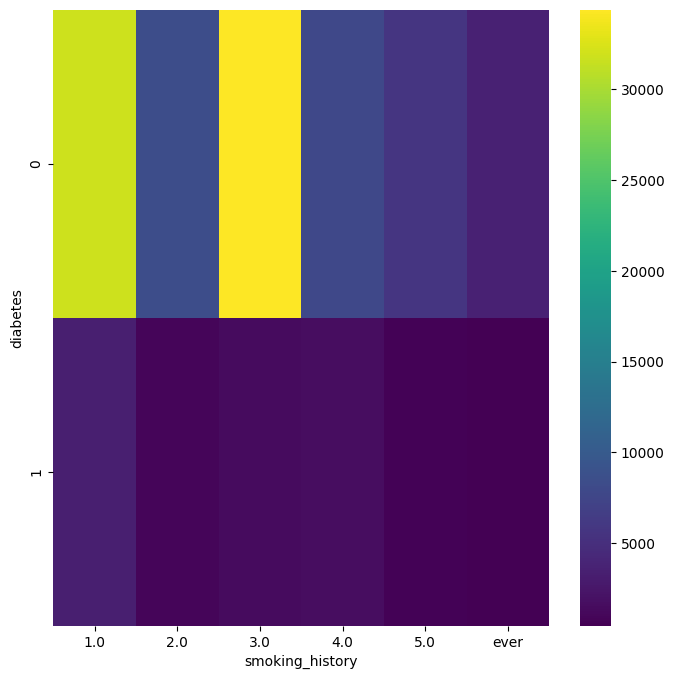

In [167]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['diabetes'].value_counts()
    for x_label, grp in df.groupby('smoking_history')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('smoking_history')
_ = plt.ylabel('diabetes')